# Data Analysis:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

## 1) Exploring the dataset.

##### Now we will show how the data set looks like, what are the data types, which columns contain certain characteristics... 

In [2]:
ccm = pd.read_csv('nuevo_ccm.csv')

In [3]:
ccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Number           17976 non-null  int64  
 1   # Bank Accounts Open      17976 non-null  int64  
 2   # Credit Cards Held       17976 non-null  int64  
 3   # Homes Owned             17976 non-null  int64  
 4   Household Size            17976 non-null  int64  
 5   Average Balance           17976 non-null  float64
 6   Q1 Balance                17976 non-null  float64
 7   Q2 Balance                17976 non-null  float64
 8   Q3 Balance                17976 non-null  float64
 9   Q4 Balance                17976 non-null  float64
 10  new_income_level          17976 non-null  int64  
 11  new_offer_accepted        17976 non-null  int64  
 12  new_credit_rating         17976 non-null  int64  
 13  new_own_your_home         17976 non-null  int64  
 14  new_ov

We create a heatmap using seaborn to visualize which columns have high collinearity and need to be removed.

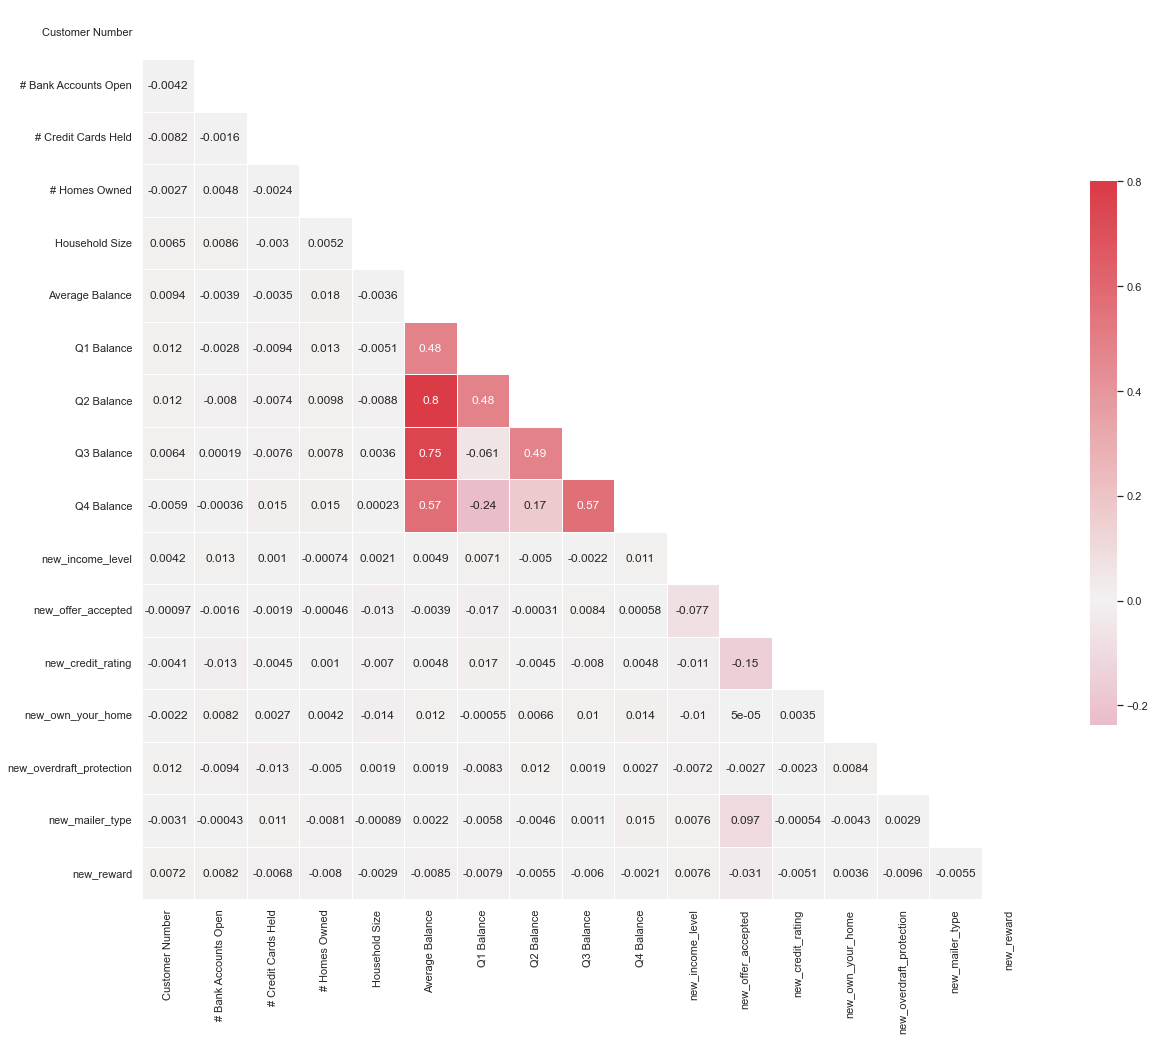

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 20))

sns.set(style='white')

mask=np.triu(np.ones_like(ccm.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(ccm.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Next, we remove the columns with high linearity.

In [5]:
ccm.drop(['Average Balance', 'Q2 Balance', 'Q3 Balance'], axis=1, inplace=True)

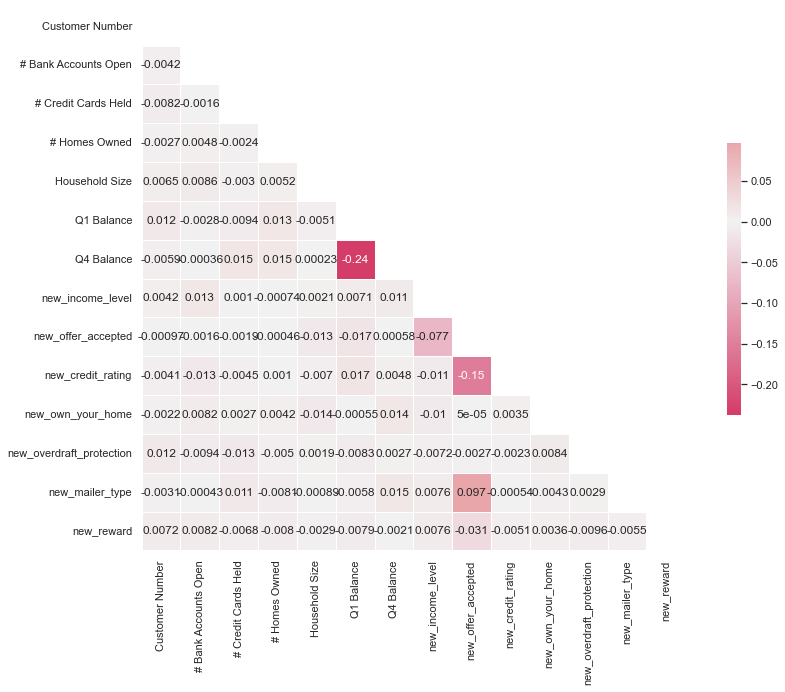

In [6]:
plt.figure(figsize=(15,10))
sns.set(style='white')

mask=np.triu(np.ones_like(ccm.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(ccm.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Confusion Matrix

In [8]:
from sklearn.model_selection import train_test_split

x = ccm.drop('new_offer_accepted', axis=1)
y = ccm['new_offer_accepted']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, stratify=y)

In [9]:
y_train.value_counts(normalize= True), y_test.value_counts(normalize=True)

(0    0.943185
 1    0.056815
 Name: new_offer_accepted, dtype: float64,
 0    0.94327
 1    0.05673
 Name: new_offer_accepted, dtype: float64)

In [10]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=2000)
lg.fit(x_train,y_train)
pred = lg.predict(x_test)

Accuracy lg: 0.9432703003337041


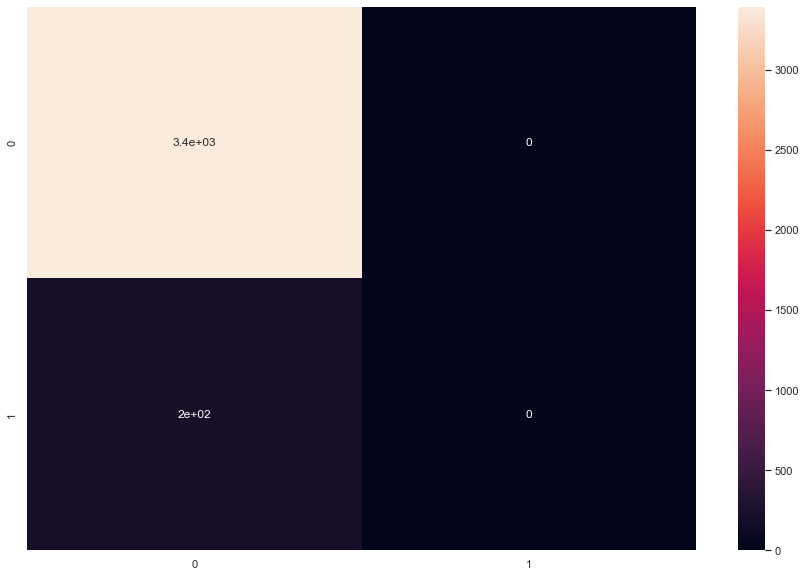

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, pred)
print(f'Accuracy lg: {acc}')

cm = confusion_matrix(y_test,pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.show()